<img src="Logo.png" width="100" align="left"/> 

# <center>Data Analytics project:</center>



Congratulations on finishing the lessons content for this second unit !

We have seen a lot of concepts in the second unit and we had the chance to test some of them. Now, we get to see how these different concepts are used to better understand our data.

## Some guidelines: 
1. To run a cell you can use the shortcut use : Shift + Enter

2. Only sections mentioned as To-Do are the places where you should put in your own code other than that we do not recommend that you change the provided code.

3. You will be graded for the visibility of your code so make sure you respect the correct indentation and that your code contains suitable variables names.

4. This notebook is designed in a sequential way so if you solve your project on different days make sure to run the previous cells before you can run the one you want.

5. Teacher assistants in the slack space remain available to answer any questions you might have.

>Best of luck ! 

## Project Sections:
In this project you will practice some of the concepts seen in the data analytics unit, you will deal with a real dataset. This dataset contains house sale prices for King County. It includes homes sold between May 2014 and May 2015.

Our goal is to analyze this dataset, clean it then create a simple linear regression model using it.

This project is devided into n sections : 
1. [Setting the environement](#set_env)

2. [Importing necessary tools](#importing)

3. [Dataset discovery](#dataset_discovery)

4. [NA handling](#na_handling)

5. [Useless variables deletion](#useless_var)

6. [Outliers detection](#outliers)

7. [Feature selection](#feature_selection)

8. [Linear regression](#linear_reg)

### 1. Setting the environement:  <a id='set_env'></a>

In [42]:
# Make sure you have virtualenv installed 
!pip install --user virtualenv

In [43]:
# To-Do: create a virtual environement called data_analytics
!virtualenv data_analytics

created virtual environment CPython3.8.8.final.0-64 in 2237ms
  creator CPython3Windows(dest=C:\Users\PC\Unit2-Project\data_analytics, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=C:\Users\PC\AppData\Local\pypa\virtualenv)
    added seed packages: pip==21.3.1, setuptools==59.6.0, wheel==0.37.0
  activators BashActivator,BatchActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [44]:
# Activate the environement for windows
#!source data_analytics/bin/activate (this line doesn't work for me )
!data_analytics\Scripts\activate

### 2. Importing necessary tools:<a id='importing'></a>

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 3. Dataset discovery:<a id='dataset_discovery'></a>

In [112]:
# To-Do: Read the file ("kc_house_data.csv") using pandas and store in a dataframe called df
df=pd.read_csv("kc_house_data.csv")
# To-Do: Print the dataframe's shape
df.shape

(21613, 21)

In [113]:
# To-Do: Print the dataframe's info
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,...,7,1180.0,0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,...,7,2170.0,400,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000.0,1.0,0,0,...,6,770.0,0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,...,7,1050.0,910,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,...,8,1680.0,0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503


### 4. NA handling:<a id='na_handling'></a>
It is clear after printing the dataset info that there are some variables that have less entries than the number of rows which means that some of them don't have values in certain rows.

Given the number of the na values, what do you think is the best method to deal with them?

In [114]:
#the number of na values in the whole dataset is 
print("the number of na values ",df.isnull().sum().sum())
# To-Do: deal with the NAs in your dataset in one line
df=df.dropna(how="any")

the number of na values  25


### 5. Useless variables deletion:<a id='useless_var'></a>
We want to eventually do a regression on it so naturally some variables bring no added value and can be delted without impacting the results.

Delete the column that correspond to variables that aren't needed.

In [115]:
df.describe()
#we see that the column date doesn't appear so it's useless

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.158800e+04,2.158800e+04,21588.000000,21588.000000,21588.000000,2.158800e+04,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000
mean,4.579710e+09,5.401545e+05,3.370576,2.114670,2079.916528,1.511370e+04,1.494187,0.007550,0.234297,3.409626,7.656985,1788.385353,291.531175,1971.004910,84.408329,98077.940661,47.560054,-122.213889,1986.594265,12771.769826
std,2.876673e+09,3.671493e+05,0.929870,0.770085,918.538221,4.144320e+04,0.539989,0.086567,0.766200,0.650932,1.175540,828.218416,442.624173,29.365908,401.694992,53.509654,0.138558,0.140825,685.364986,27316.243753
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219875e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230500,1840.000000,7620.000000
75%,7.308675e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [116]:
# To-Do: delete the values of the variables that are useless
print("columns Before",df.columns)
df=df.drop(['date'], axis=1)
print("columns after",df.columns)

columns Before Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
columns after Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21588 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21588 non-null  int64  
 1   price          21588 non-null  float64
 2   bedrooms       21588 non-null  int64  
 3   bathrooms      21588 non-null  float64
 4   sqft_living    21588 non-null  float64
 5   sqft_lot       21588 non-null  float64
 6   floors         21588 non-null  float64
 7   waterfront     21588 non-null  int64  
 8   view           21588 non-null  int64  
 9   condition      21588 non-null  int64  
 10  grade          21588 non-null  int64  
 11  sqft_above     21588 non-null  float64
 12  sqft_basement  21588 non-null  int64  
 13  yr_built       21588 non-null  float64
 14  yr_renovated   21588 non-null  float64
 15  zipcode        21588 non-null  float64
 16  lat            21588 non-null  float64
 17  long           21588 non-null  float64
 18  sqft_l

### A wild playground appears !!
In the next cell, go wild with the dataset discovery.
You can calculate the mean, the median or do anything you want to learn more the data.

<b>Pro tip :</b> 
Sometimes you might want to know how many unique variables a column has, to do so you can use the padas function :

<center>pd.unique(df['column_name'])</center>

[ 221900.  538000.  180000. ...  610685. 1007500.  402101.]
4025


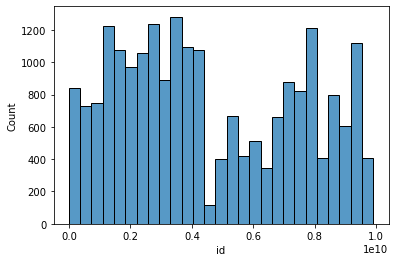

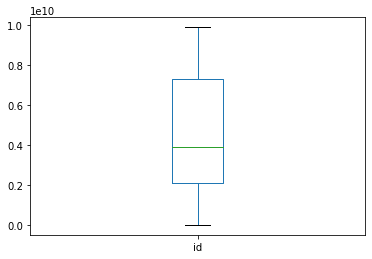

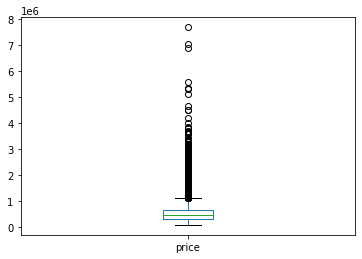

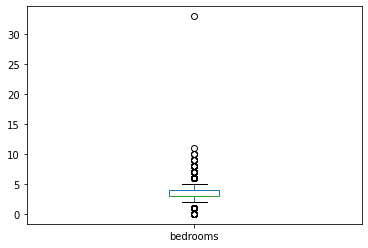

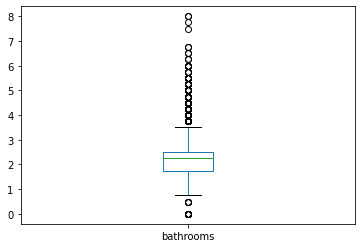

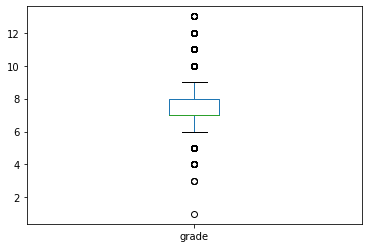

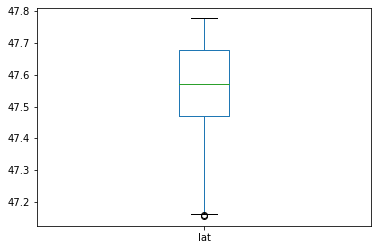

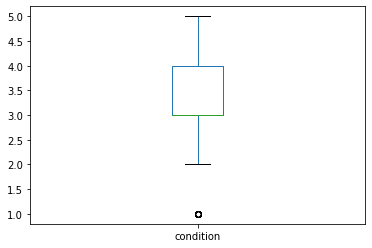

In [118]:
# To-Do : get to know more your data WITHOUT modifying it !!
print(pd.unique(df['price']))
print(df["price"].nunique())#how many unique values in price column
sns.histplot(df["id"])
plt.show()
def plot_boxplot(df,ft):  
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df,"id")
plot_boxplot(df,"price")
plot_boxplot(df,"bedrooms")
plot_boxplot(df,"bathrooms")
plot_boxplot(df,"grade")
plot_boxplot(df,"lat")
plot_boxplot(df,"condition")

### 6.Outliers detection:<a id='outliers'></a>
Having outliers is a common problem that might affect the quality of the model that we're building.

Let's assume that we're not interested in very expensive or very cheap houses, we want a model that best fits the average priced houses.

To create such a model, we detect outliers and delete them using the Z-score method seen in the lessons.

In [119]:
# To-Do : detect the outliers then delete them ad delete the column created to calculate the Z-score
# first let's finf all the outliers 
#finding all the outliers using the Zscore method
for col in (['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']):
    col_zscore = col + "_zscore"
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
    col_outlier = col +"_outlier" 
    df[col_outlier] = (abs(df[col_zscore])>3).astype(int)
    
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode_zscore,zipcode_outlier,lat_zscore,lat_outlier,long_zscore,long_outlier,sqft_living15_zscore,sqft_living15_outlier,sqft_lot15_zscore,sqft_lot15_outlier
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,...,1.869974,0,-0.352599,0,-0.306136,0,-0.943452,0,-0.260722,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,...,0.879475,0,1.161607,0,-0.746409,0,-0.432764,0,-0.187906,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,...,-0.933324,0,1.283580,0,-0.135707,0,1.070120,0,-0.172420,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,...,1.085051,0,-0.283313,0,-1.271897,0,-0.914270,0,-0.284518,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,...,-0.073646,0,0.409556,0,1.199315,0,-0.272262,0,-0.192885,0


In [120]:
#deleting the outliers
#for i in range (len(df["id"].values)):
n=0
for i, row in df.iterrows():
    for col in (['id_outlier', 'price_outlier', 'bedrooms_outlier', 'bathrooms_outlier', 'sqft_living_outlier', 'sqft_lot_outlier',
       'floors_outlier', 'waterfront_outlier', 'view_outlier', 'condition_outlier', 'grade_outlier', 'sqft_above_outlier','sqft_basement_outlier', 'yr_built_outlier',
        'yr_renovated_outlier', 'zipcode_outlier', 'lat_outlier', 'long_outlier','sqft_living15_outlier', 'sqft_lot15_outlier']):
        if(getattr(row, col)==1):
            n+=1
            df.drop(labels=[i],axis=0,inplace=True)
            break;
           
            
print(n)

2908


In [121]:
df.shape

(18680, 60)

In [122]:
#deleting the columns that i created 
for col in (['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built',
        'yr_renovated', 'zipcode', 'lat', 'long','sqft_living15', 'sqft_lot15']):
    df=df.drop([col+'_outlier'], axis=1)
    df=df.drop([col + "_zscore"],axis=1)


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18680 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             18680 non-null  int64  
 1   price          18680 non-null  float64
 2   bedrooms       18680 non-null  int64  
 3   bathrooms      18680 non-null  float64
 4   sqft_living    18680 non-null  float64
 5   sqft_lot       18680 non-null  float64
 6   floors         18680 non-null  float64
 7   waterfront     18680 non-null  int64  
 8   view           18680 non-null  int64  
 9   condition      18680 non-null  int64  
 10  grade          18680 non-null  int64  
 11  sqft_above     18680 non-null  float64
 12  sqft_basement  18680 non-null  int64  
 13  yr_built       18680 non-null  float64
 14  yr_renovated   18680 non-null  float64
 15  zipcode        18680 non-null  float64
 16  lat            18680 non-null  float64
 17  long           18680 non-null  float64
 18  sqft_l

In [124]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,7,1180.0,0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,6,770.0,0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,1050.0,910,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,8,1680.0,0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503
6,1321400060,257500.0,3,2.25,1715.0,6819.0,2.0,0,0,3,7,1715.0,0,1995.0,0.0,98003.0,47.3097,-122.327,2238.0,6819


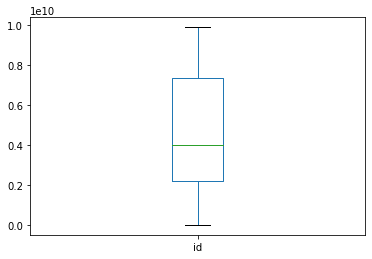

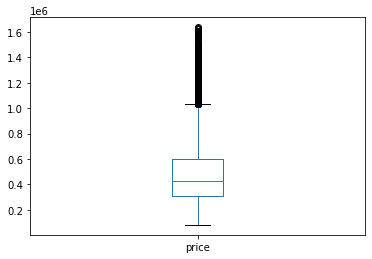

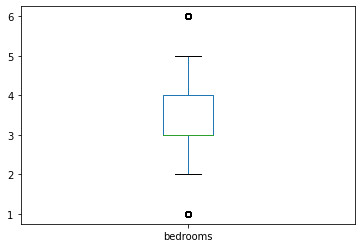

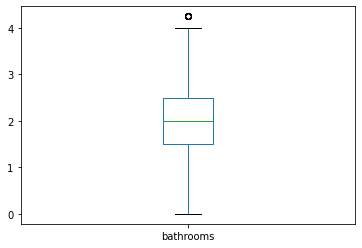

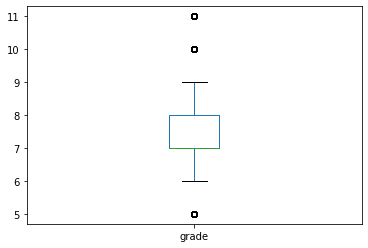

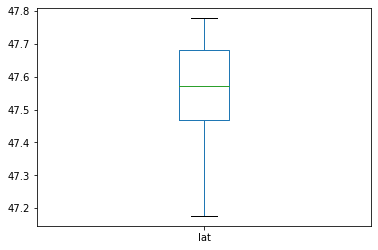

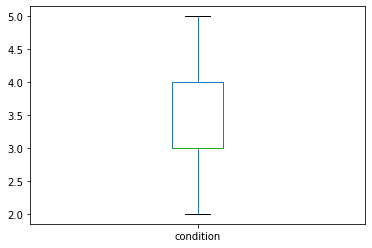

In [125]:
def plot_boxplot(df,ft):  
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df,"id")
plot_boxplot(df,"price")
plot_boxplot(df,"bedrooms")
plot_boxplot(df,"bathrooms")
plot_boxplot(df,"grade")
plot_boxplot(df,"lat")
plot_boxplot(df,"condition")

### 7.Feature selection:<a id='feature_selection'></a>
It is clear that even after deleting some features, there might be other features that aren't obviously useless but can be delted and keep a good overall performance.

To verify this, we perform feature selection on our variables.

In [126]:
# To-Do : perform feature selection using correlation
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.006193,0.002920,0.030795,0.018616,-0.117229,0.031671,NaN,0.021414,-0.030232,0.035554,0.024237,-0.008829,0.033010,NaN,-0.018926,-0.008276,0.042911,0.019857,-0.110323
price,0.006193,1.000000,0.302698,0.442739,0.622011,0.100983,0.276244,NaN,0.182384,0.049764,0.634539,0.533094,0.210767,0.064902,NaN,-0.042012,0.428218,0.075686,0.550750,0.092859
bedrooms,0.002920,0.302698,1.000000,0.488803,0.608700,0.112899,0.160276,NaN,0.038854,0.023324,0.334123,0.485524,0.272352,0.176567,NaN,-0.178906,-0.042376,0.183565,0.406681,0.114508
bathrooms,0.030795,0.442739,0.488803,1.000000,0.711326,0.063611,0.519361,NaN,0.066297,-0.145727,0.618980,0.632696,0.198889,0.586004,NaN,-0.232429,-0.005798,0.288813,0.537777,0.067103
sqft_living,0.018616,0.622011,0.608700,0.711326,1.000000,0.231284,0.356802,NaN,0.122572,-0.074844,0.711378,0.857297,0.338393,0.371096,NaN,-0.228293,0.029337,0.317224,0.750123,0.234865
sqft_lot,-0.117229,0.100983,0.112899,0.063611,0.231284,1.000000,-0.101556,NaN,0.031356,0.045785,0.142843,0.213217,0.050961,0.023232,NaN,-0.180524,-0.052356,0.272417,0.270206,0.817155
floors,0.031671,0.276244,0.160276,0.519361,0.356802,-0.101556,1.000000,NaN,-0.016824,-0.288807,0.473638,0.538157,-0.303811,0.538010,NaN,-0.068929,0.036719,0.153725,0.280142,-0.104807
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,0.021414,0.182384,0.038854,0.066297,0.122572,0.031356,-0.016824,NaN,1.000000,0.033871,0.106320,0.041672,0.157376,-0.060817,NaN,0.083944,0.009866,-0.077069,0.142871,0.018126
condition,-0.030232,0.049764,0.023324,-0.145727,-0.074844,0.045785,-0.288807,NaN,0.033871,1.000000,-0.182932,-0.184541,0.194702,-0.399269,NaN,-0.000336,-0.008328,-0.100875,-0.119366,0.053759


id  is not correlated  with  price
id  is not correlated  with  bedrooms
id  is not correlated  with  bathrooms
id  is not correlated  with  sqft_living
id  is not correlated  with  sqft_lot
id  is not correlated  with  floors
id  is not correlated  with  view
id  is not correlated  with  condition
id  is not correlated  with  grade
id  is not correlated  with  sqft_above
id  is not correlated  with  sqft_basement
id  is not correlated  with  yr_built
id  is not correlated  with  zipcode
id  is not correlated  with  lat
id  is not correlated  with  long
id  is not correlated  with  sqft_living15
id  is not correlated  with  sqft_lot15
price  is not correlated  with  id
price  is not correlated  with  sqft_lot
price  is not correlated  with  floors
price  is not correlated  with  view
price  is not correlated  with  condition
price  is not correlated  with  sqft_basement
price  is not correlated  with  yr_built
price  is not correlated  with  zipcode
price  is not correlated  with  long

sqft_lot15  is not correlated  with  id
sqft_lot15  is not correlated  with  price
sqft_lot15  is not correlated  with  bedrooms
sqft_lot15  is not correlated  with  bathrooms
sqft_lot15  is not correlated  with  sqft_living
sqft_lot15  is highly  correlated  with  sqft_lot
sqft_lot15  is not correlated  with  floors
sqft_lot15  is not correlated  with  view
sqft_lot15  is not correlated  with  condition
sqft_lot15  is not correlated  with  grade
sqft_lot15  is not correlated  with  sqft_above
sqft_lot15  is not correlated  with  sqft_basement
sqft_lot15  is not correlated  with  yr_built
sqft_lot15  is not correlated  with  zipcode
sqft_lot15  is not correlated  with  lat
sqft_lot15  is not correlated  with  sqft_living15


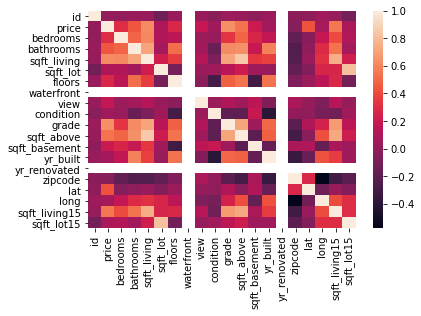

In [127]:
# To-Do : drop the variables that seem highly correlated to you
import numpy as np
s=list()
sns.heatmap(df.corr())
for i in (df.columns):
    for j in (df.columns):
        if i!=j:
            corr_1=np.abs(df[i].corr(df[j]))
            if corr_1 <0.3:
                print( i , " is not correlated  with ", j)
            elif corr_1>0.75:
                print( i , " is highly  correlated  with ", j)
                #so we will just keep one of them in a list and then drop them from the database
                s.append(j)
                

In [130]:
s

['sqft_above',
 'sqft_living15',
 'sqft_lot15',
 'sqft_living',
 'sqft_living',
 'sqft_lot']

In [131]:
df.drop(s,axis=1, inplace = True)    
df.head()

,id,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,221900.0,3,1.00,1.0,0,0,3,7,0,1955.0,0.0,98178.0,47.5112,-122.257
2,5631500400,180000.0,2,1.00,1.0,0,0,3,6,0,1933.0,0.0,98028.0,47.7379,-122.233
3,2487200875,604000.0,4,3.00,1.0,0,0,5,7,910,1965.0,0.0,98136.0,47.5208,-122.393
4,1954400510,510000.0,3,2.00,1.0,0,0,3,8,0,1987.0,0.0,98074.0,47.6168,-122.045
6,1321400060,257500.0,3,2.25,2.0,0,0,3,7,0,1995.0,0.0,98003.0,47.3097,-122.327


<AxesSubplot:>

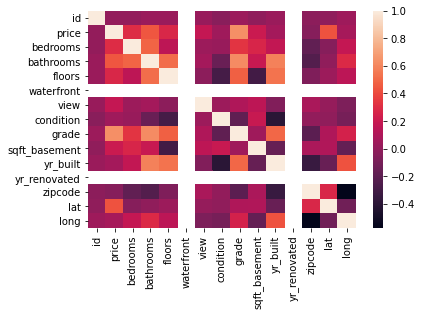

In [132]:
sns.heatmap(df.corr())

### 8.Linear regression:<a id='linear_reg'></a>
Now that our data is clean and ready to be used, let's try to fit it into a linear regression model.

<ul>
    <li>We begin by splitting our variables into dependant and independant variables.</li>
    <li>We create the model using the LinearRegression class.</li>
    <li>We evaluate our model using the R² score</li>
</ul>

In [133]:
# Splitting the data into dependant and independant variables
Y = df['price']
X = df.drop(['price'],axis = 1)

In [134]:
from sklearn.linear_model import LinearRegression
# To-Do : Create a linear regression model using the LinearRegression class then fit it to the data
model=LinearRegression()
model.fit(X,Y)


LinearRegression()

In [136]:
# The function used to calculate the R² score is the method "score" found in the LinearRegression class
model.score(X, Y)

0.6409370064267694

## Conclusion:
Data preparation is a very important step in the machine learning pipeline. It is crucial to clean our data and understand it very well before we can create any model on the data.

In this notebook, we have spent 4 steps preparing our data but only 1 to create the model. This reflects how time consuming the process of data preparation is compared to the other steps as well as the importance of the quality of the data used.

In the next unit, we will see more about the models creation process and see a lot of important concepts in depth.